In [62]:
import sys 
sys.path.append("C:/Users/esa276/Documents/Python/course-multi-armed-bandits") # of 'C:\\Users\\esa276\\Documents\\Python\\course-multi-armed-bandits'
from Homework_1 import Bandit
import numpy as np
from matplotlib import pyplot as plt

def UCB(bandit):
    for t in range(0,n):
        action = bandit.ucb_action()
        bandit.pull(action)
        bandit.update_ucb(action,delta)

# input
# number of arms k and horizon n, delta = 1/n^2?
k = 2
n = 1000
delta = 1/n**2

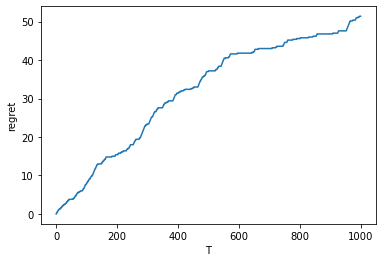

In [63]:
means = [0.5,0.3]
regret = np.array([])
bandit = Bandit.BernoulliBandit(k, means)
for i in range(0, n):    
    action = bandit.ucb_action()
    bandit.pull(action)
    bandit.update_ucb(action,delta)
    
    regret = np.append(regret,bandit.regret)

plt.plot(np.arange(0,n),regret)
plt.xlabel('T')
plt.ylabel('regret')
plt.show()

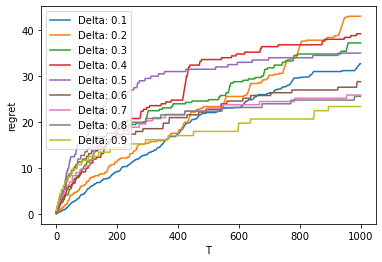

In [64]:
for Delta in np.arange(0.1, 1, 0.1):
    means = [0.5-0.5*Delta, 0.5+0.5*Delta]
    regret = np.array([])
    bandit = Bandit.BernoulliBandit(k, means)
    for i in range(0, n):    
        action = bandit.ucb_action()
        bandit.pull(action)
        bandit.update_ucb(action,delta)

        regret = np.append(regret,bandit.regret)
    plt.plot(np.arange(0,n),regret, label = "Delta: %.1f" % Delta)

    
plt.xlabel('T')
plt.ylabel('regret')
plt.legend()
plt.show()

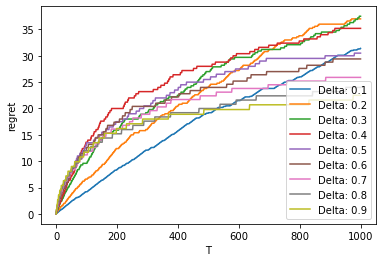

In [65]:
for Delta in np.arange(0.1, 1, 0.1):
    means = [Delta, 0]
    regret = np.array([])
    bandit = Bandit.BernoulliBandit(k, means)
    for i in range(0, n):    
        action = bandit.ucb_action()
        bandit.pull(action)
        bandit.update_ucb(action,delta)

        regret = np.append(regret,bandit.regret)
    plt.plot(np.arange(0,n),regret, label = "Delta: %.1f" % Delta)

plt.xlabel('T')
plt.ylabel('regret')
plt.legend()
plt.show()

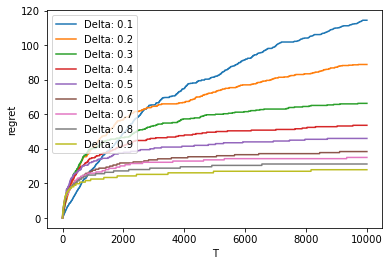

In [66]:
n=10_000
for Delta in np.arange(0.1, 1, 0.1):
    means = [Delta, 0]
    regret = np.array([])
    bandit = Bandit.BernoulliBandit(k, means)
    for i in range(0, n):    
        action = bandit.ucb_action()
        bandit.pull(action)
        bandit.update_ucb(action,delta)

        regret = np.append(regret,bandit.regret)
    plt.plot(np.arange(0,n),regret, label = "Delta: %.1f" % Delta)

    
plt.xlabel('T')
plt.ylabel('regret')
plt.legend()
plt.show()

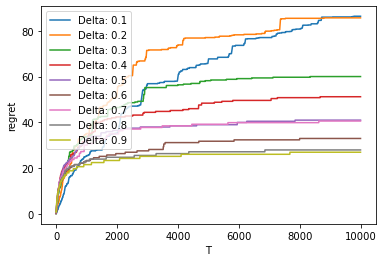

In [67]:
for Delta in np.arange(0.1, 1, 0.1):
    
    means = [0.5-0.5*Delta, 0.5+0.5*Delta]
    regret = np.array([])
    bandit = Bandit.BernoulliBandit(k, means)
    for i in range(0, n):    
        action = bandit.ucb_action()
        bandit.pull(action)
        bandit.update_ucb(action,delta)
        regret = np.append(regret,bandit.regret)
    plt.plot(np.arange(0,n),regret, label = "Delta: %.1f" % Delta)

    
plt.xlabel('T')
plt.ylabel('regret')
plt.legend()
plt.show()

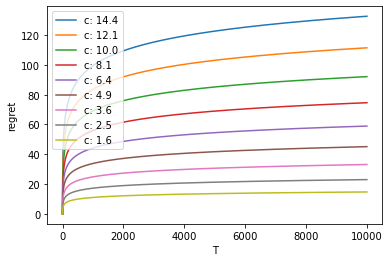

In [107]:
from math import log

for c in [x**2/10 for x in np.arange(12, 3, -1)]:
    plt.plot(np.arange(1,n),[c*log(x) for x in range(1,n)], label = "c: %.1f" % c)
    
plt.xlabel('T')
plt.ylabel('regret')
plt.legend()
plt.show()

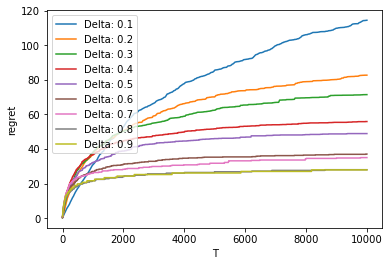

In [84]:
n = 10_000
for Delta in np.arange(0.1, 1, 0.1):
    options = np.arange(0, 1-Delta, 0.1)
    av_regret = np.zeros(n, dtype=np.float64)
    for mean1 in options:
        means = [mean1, mean1 + Delta]
        regret = np.array([])
        bandit = Bandit.BernoulliBandit(k, means)
        for i in range(0, n):    
            action = bandit.ucb_action()
            bandit.pull(action)
            bandit.update_ucb(action,delta)
            regret = np.append(regret,bandit.regret)
        av_regret += regret
    av_regret /= len(options)
    plt.plot(np.arange(0,n),av_regret, label = "Delta: %.1f" % Delta)

    
plt.xlabel('T')
plt.ylabel('regret')
plt.legend()
plt.show()

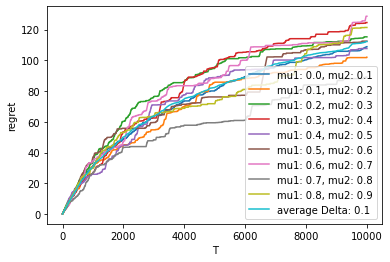

In [90]:
Delta = 0.1
options = np.arange(0, 1-Delta, 0.1)
av_regret = np.zeros(n, dtype=np.float64)
for mean1 in options:
    means = [mean1, mean1 + Delta]
    regret = np.array([])
    bandit = Bandit.BernoulliBandit(k, means)
    for i in range(0, n):    
        action = bandit.ucb_action()
        bandit.pull(action)
        bandit.update_ucb(action,delta)
        regret = np.append(regret,bandit.regret)
    av_regret += regret
    plt.plot(np.arange(0,n),regret, label = "mu1: %.1f, mu2: %.1f" % (mean1, mean1+Delta))
av_regret /= len(options)
plt.plot(np.arange(0,n),av_regret, label = "average Delta: %.1f" % Delta)

    
plt.xlabel('T')
plt.ylabel('regret')
plt.legend()
plt.show()

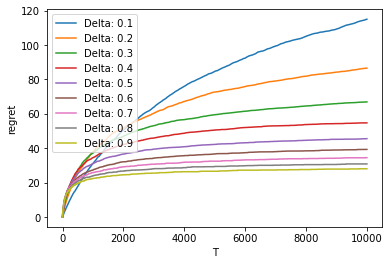

In [91]:
n=10_000
n_sim=10
for Delta in np.arange(0.1, 1, 0.1):
    av_regret = np.zeros(n, dtype=np.float64)
    means = [Delta, 0]
    for sim in range(0,n_sim):
        regret = np.array([])
        bandit = Bandit.BernoulliBandit(k, means)
        for i in range(0, n):    
            action = bandit.ucb_action()
            bandit.pull(action)
            bandit.update_ucb(action,delta)

            regret = np.append(regret,bandit.regret)
        av_regret += regret
    av_regret /= n_sim
    plt.plot(np.arange(0,n),av_regret, label = "Delta: %.1f" % Delta)

    
plt.xlabel('T')
plt.ylabel('regret')
plt.legend()
plt.show()